In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


import statsmodels.api as sm
import statsmodels.formula.api as smf


In [53]:
# Importazione dataset

data = pd.read_csv('data.csv', usecols=[1,2,3,4,5,6,7,8,9,10])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

In [54]:
# Dimensione dataset

df = pd.DataFrame(data)

print("La dimensione del dataset è: ", df.shape)

La dimensione del dataset è:  (6819, 10)


In [55]:
# Valori Mancanti

# print(df.head())

# missing_values = df.isnull()
missing_values_count = df.isnull().sum()
print(missing_values_count)

ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
dtype: int64


In [56]:
# Valori Duplicati

Duplicates = df.duplicated().sum()
print("Numero di duplicati: ", Duplicates)

Numero di duplicati:  0


In [57]:
# Tipologia dati

print(df.dtypes)

ROA(C) before interest and depreciation before interest    float64
ROA(A) before interest and % after tax                     float64
ROA(B) before interest and depreciation after tax          float64
Operating Gross Margin                                     float64
Realized Sales Gross Margin                                float64
Operating Profit Rate                                      float64
Pre-tax net Interest Rate                                  float64
After-tax net Interest Rate                                float64
Non-industry income and expenditure/revenue                float64
Continuous interest rate (after tax)                       float64
dtype: object


In [58]:
# Modifica intestazione colonne

df.rename

<bound method DataFrame.rename of       ROA(C) before interest and depreciation before interest  \
0                                              0.370594         
1                                              0.464291         
2                                              0.426071         
3                                              0.399844         
4                                              0.465022         
...                                                 ...         
6814                                           0.493687         
6815                                           0.475162         
6816                                           0.472725         
6817                                           0.506264         
6818                                           0.493053         

      ROA(A) before interest and % after tax  \
0                                   0.424389   
1                                   0.538214   
2                                   0.499

In [59]:
# variabili dummy

variabili_dummy = pd.get_dummies(df)
print(variabili_dummy)

      ROA(C) before interest and depreciation before interest  \
0                                              0.370594         
1                                              0.464291         
2                                              0.426071         
3                                              0.399844         
4                                              0.465022         
...                                                 ...         
6814                                           0.493687         
6815                                           0.475162         
6816                                           0.472725         
6817                                           0.506264         
6818                                           0.493053         

      ROA(A) before interest and % after tax  \
0                                   0.424389   
1                                   0.538214   
2                                   0.499019   
3                          

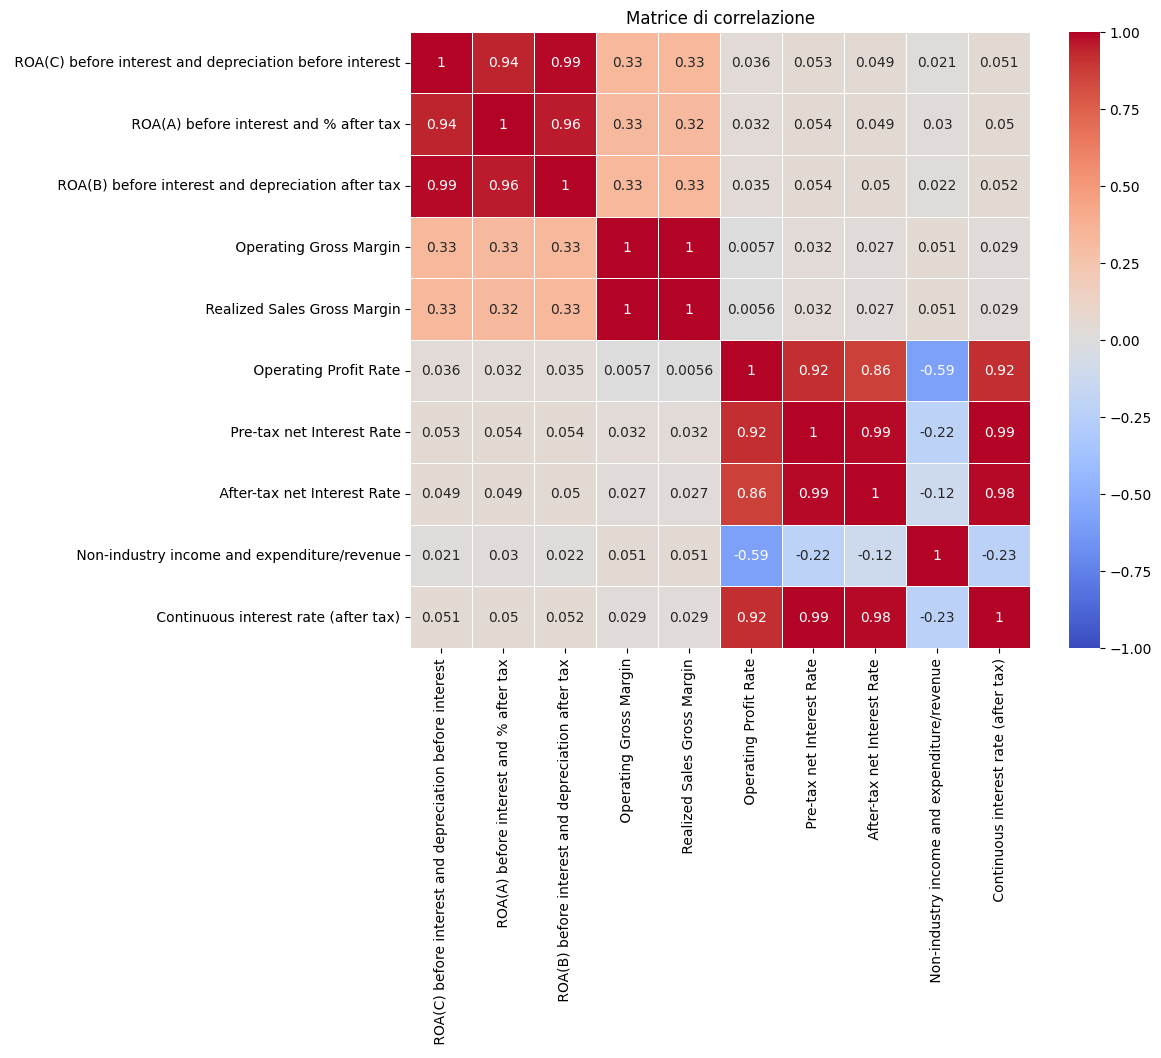

In [60]:
# Matrice di Correlazione
correlation_matrix = data.corr()
correlation_matrix

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()
